In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Example: Predicting house prices based on size and number of bedrooms
# Data: [Size (sq ft), Number of Bedrooms]
A = np.array([[1400, 3, 2],
              [1600, 3, 1],
              [1700, 3, 1],
              [1875, 4, 3],
              [1100, 2, 2]])

# Prices (target values in $1000s)
b = np.array([245, 312, 279, 308, 199])

# Append a column of ones to A for the intercept term
# A = np.hstack([A, np.ones((A.shape[0], 1))]) # extra dimentions

# Compute the SVD of X
U, S, Vt = np.linalg.svd(A, full_matrices=False)

# Compute the pseudoinverse of X using SVD
S_inv = np.diag(1 / S)

# Solve for the least squares solution
w = Vt.T @ S_inv @ U.T @ b

print("Estimated coefficients:", w)
print()

# Predict price of a new house (e.g., 1500 sq ft, 3 bedrooms)
new_house = np.array([1400, 3 , 2])  # Include intercept term  (sqft_to_sqm = 0.092903)
predicted_price = new_house @ w
print(f"Predicted price for a {new_house[0]} sq ft house with {new_house[1]} bedrooms and {new_house[2]} floors : ${predicted_price * 1000:.2f}")


Estimated coefficients: [ 0.19093667 -5.1133429  -5.92734167]

Predicted price for a 1400 sq ft house with 3 bedrooms and 2 floors : $240116.62


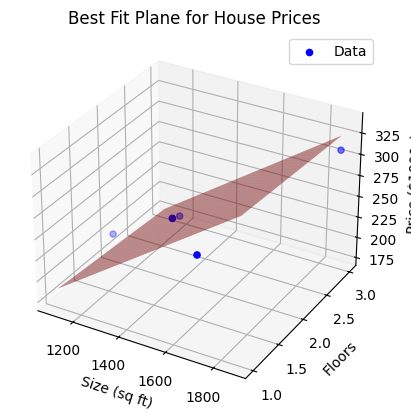

In [20]:
x_vals = np.linspace(min(A[:, 0]), max(A[:, 0]), 100)  # House Size
z_vals = np.linspace(min(A[:, 2]), max(A[:, 2]), 100)  # Number of Floors
x_vals, z_vals = np.meshgrid(x_vals, z_vals)

# Compute predicted y-values using the new model
y_vals = w[0] * x_vals + w[1] * np.mean(A[:, 1]) + w[2] * z_vals  # Use average bedrooms

# 3D Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot Data Points
ax.scatter(A[:, 0], A[:, 2], b, color='blue', label='Data')  # x=size, z=floors, y=price

# Plot Best Fit Plane
ax.plot_surface(x_vals, z_vals, y_vals, color='red', alpha=0.5)

ax.set_xlabel('Size (sq ft)')
ax.set_ylabel('Floors')
ax.set_zlabel('Price ($1000s)')
ax.set_title('Best Fit Plane for House Prices')
ax.legend()
plt.show()